# Data Science Internship 
# Task 02: SALES PREDICTION USING PYTHON
# M.Faraz Shoaib
## Importing Libraries and Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
sales_data = pd.read_csv('advertising.csv')
sales_data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


## Data Validation 


In [3]:
sales_data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [4]:
sales_data.isnull()

,TV,Radio,Newspaper,Sales
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
195,False,False,False,False
196,False,False,False,False
197,False,False,False,False
198,False,False,False,False


In [5]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


## Checking The most Correlated Advertisment Type 

In [6]:
sales_data.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


Text(0.5, 1.0, 'Newspaper & Sales Relation')

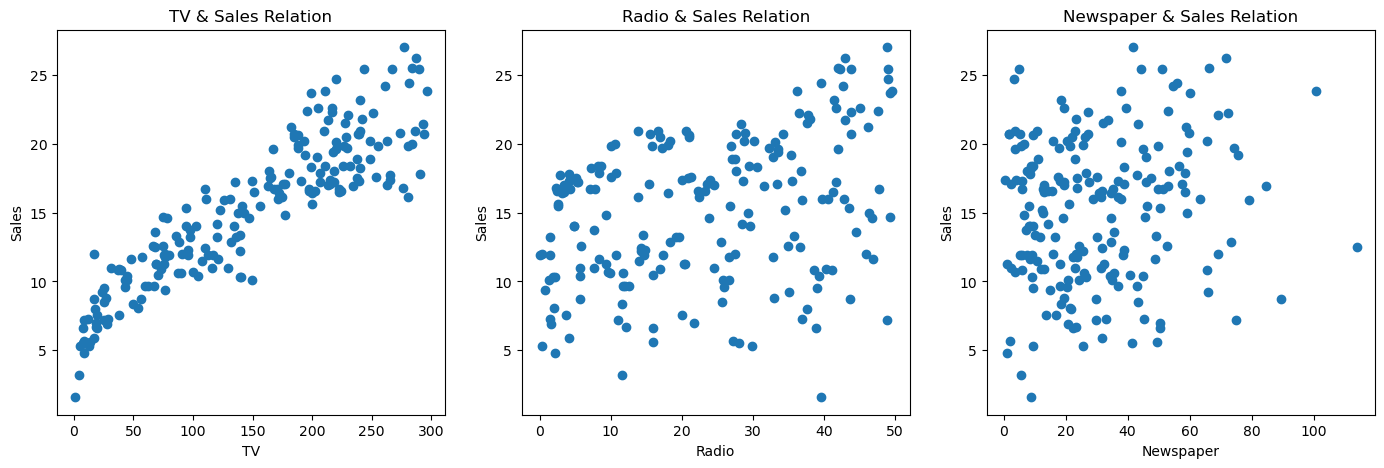

In [7]:
#%matplotlib inline
fig,axes = plt.subplots(1,3, figsize=(17,5))
axes[0].scatter(sales_data.TV,sales_data.Sales)
axes[0].set_xlabel("TV")
axes[0].set_ylabel("Sales")
axes[0].set_title("TV & Sales Relation")

axes[1].scatter(sales_data.Radio,sales_data.Sales)
axes[1].set_xlabel("Radio")
axes[1].set_ylabel("Sales")
axes[1].set_title("Radio & Sales Relation")

axes[2].scatter(sales_data.Newspaper,sales_data.Sales)
axes[2].set_xlabel("Newspaper")
axes[2].set_ylabel("Sales")
axes[2].set_title("Newspaper & Sales Relation")


# Since TV is the most Correlated with sales so we will Use TV and Sales Data for Training Our Model for Sales Prediction

## Splitting Data and Reshaping it For LinearResgression Model 

In [8]:
X = sales_data.TV
y = sales_data.Sales
X_reshape = X.values.reshape(-1,1)


## Training Model with the Splitted Dataset

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_reshape,y,test_size = 0.2, random_state = 0)

In [10]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_reshape,y)
print("Trained")

Trained


## Predicting the Model  

[10.8129836   9.74806001 11.98883674 23.04296549 16.41492542 10.09194159
  7.45736499 20.29191288  8.29488303 17.93466013 21.46776601 11.81134947
 15.66060454 17.39110538 11.21232995 13.6416869  21.70626452  7.01364683
 11.11803984 18.81100351 22.92648948 14.75652879 16.6867028  14.27953176
  9.94218671 13.80253473 16.15978748 18.34509943 19.39893007  8.36698723
 10.73533293 18.00676433 22.54378256 20.38065651  7.70695646  8.0120127
 10.28052181 17.00285199 10.76861179  8.36144075]


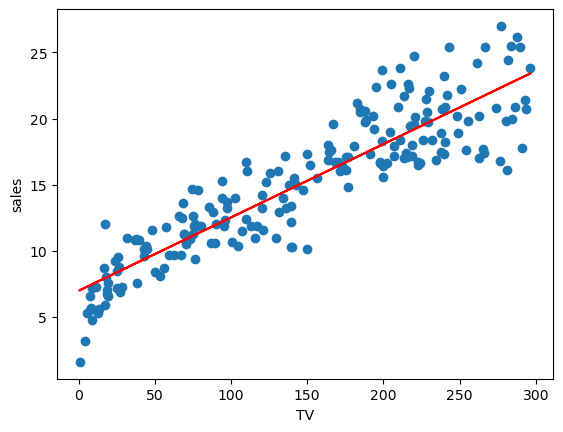

In [11]:
predicttion = model.predict(X_test)
print(predicttion)
line = model.coef_*X_reshape + model.intercept_
plt.scatter(sales_data.TV, sales_data.Sales)
plt.xlabel("TV")
plt.ylabel("sales")
plt.plot(X_reshape, line , color ="red")

## Predicting for any random value

In [12]:
print(model.predict([[300]]))

[23.61425263]


## Finding the Possible Error

In [13]:
from sklearn import metrics
print ("Mean Squared Error" ,metrics.mean_squared_error(y_test,predicttion))
print("Root Mean Squared Error", np.sqrt(metrics.mean_squared_error(y_test,predicttion)))

Mean Squared Error 6.559044938449846
Root Mean Squared Error 2.5610632437426935


# Thank You